# APU
PROPAGAÇÃO ANALÍTICA DE ERROS E INCERTEZAS EM DEEP LEARNING NO DOMÍNIO DAS CIÊNCIAS FÍSICAS
O conjunto de dados escolhido foi o Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise), retirado do UCI Machine Learning Repository. A variável prevista selecionada foi "Pressure", e todas as outras variáveis foram consideradas como variáveis preditoras.s.

In [20]:
#importação e tratamento dos dados 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
%matplotlib inline
%reload_ext autoreload
%autoreload 2
df=pd.read_csv('airfoil.csv')
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
df_n=pd.DataFrame(df_n)
y=df_n[5]
X=df_n[df_n.columns[0:5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

# Rede Neural 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

# Configurações básicas
input_dim = X_train.shape[1]
# Criando o modelo sequencial
model = Sequential()
# Adicionando a camada de entrada
model.add(Input(shape=(input_dim,)))
# Primeira camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Segunda camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Camada de saída
model.add(Dense(1))  # Uma unidade de saída para regressão
# Compilando o modelo
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Resumo do modelo
model.summary()

# Treinamento do modelo
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Métricas para conjunto treino  
from sklearn import metrics
y_hat_train = model.predict(X_train)# passamos  o conjunto de treino pela rede e obtemos as predições 
y_hat_test = model.predict(X_test)# passamos  o conjunto de teste pela rede e obtemos as predições
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)
MAE_T,R2_T,RMSE_T


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1895 - mean_absolute_error: 0.3605 - val_loss: 0.0323 - val_mean_absolute_error: 0.1516
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0758 - mean_absolute_error: 0.2238 - val_loss: 0.0173 - val_mean_absolute_error: 0.1093
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0570 - mean_absolute_error: 0.1945 - val_loss: 0.0133 - val_mean_absolute_error: 0.0940
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0413 - mean_absolute_error: 0.1598 - val_loss: 0.0122 - val_mean_absolute_error: 0.0878
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0334 - mean_absolute_error: 0.1478 - val_loss: 0.0134 - val_mean_absolute_error: 0.0913
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 - mean_absolute_error: 0.1489 - val_loss: 0.0111 - val_mean_absolute_error: 0.0785
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - mean_absolute_error: 0.1340 - val_loss

(0.04443135363397683, 0.8992628826910902, 0.0034155631472630676)

In [18]:
# Métricas para conjunto teste
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)
MAE_t,R2_T,RMSE_T

(0.036711676515803586, 0.8855816704851651, 0.0038794343148005443)

Na sequencia faremos a determinação do erro aleatório e erro sistemático em todo o dataset.Estes erros serão importantes para compor a incerteza do modelo, baseado no desempenho. Como queremos um panorama do erro para previsões futuras optou-se por usar todos os dados (treino e teste) que ao passar pelo modelo. Analisaremos também a distribuição dos erros e a localização da média > O esperado é uma curva normal com média=0 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


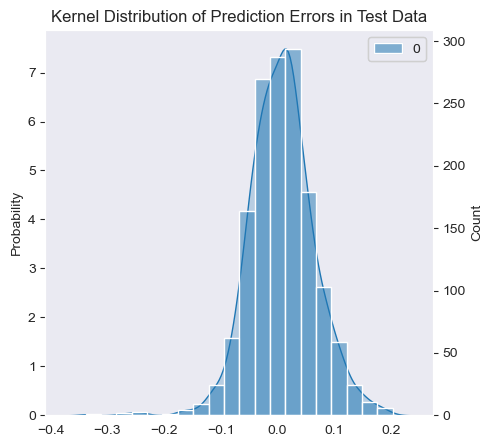

In [41]:
previsão=model.predict(X[:1503])# passando todos os dados pela rede (sem distinção de treino e teste)
previsão=pd.DataFrame(previsão)
df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão 
df.resume4.columns=['x1','x2','x3','x4','x5','y','predict']
erro=df.resume4['predict']-df.resume4['y']#determinando o erro entre o real e a predição 
#erro sistemático 
SE=erro.loc[:,].mean()
#erro randômico
RE=erro.loc[:,].std()
erro=pd.DataFrame(erro) # passando para dataframe

# Histograma do erro randômico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.kdeplot(erro, ax=ax, fill=True)  # fill=True para preencher a área sob a curva
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.histplot(erro, ax=ax_copy, bins=bins, kde=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


Elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

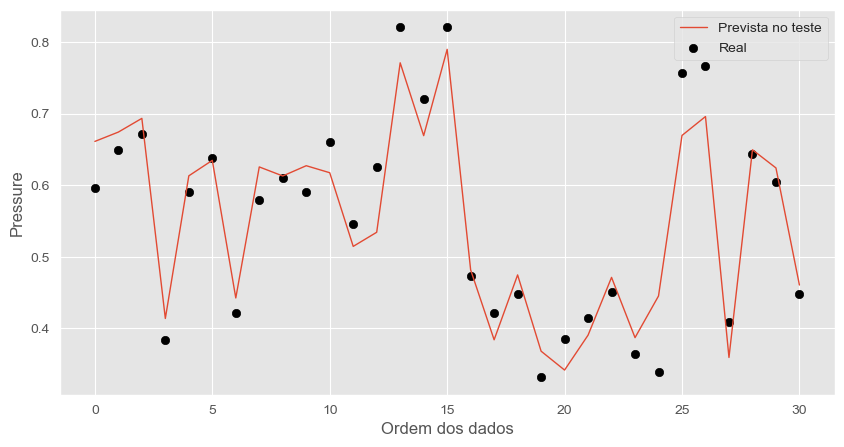

In [136]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)#y_hat_test é a prediçã osobre os dados de teste
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

# MC DROPOUT

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22804\523865506.py:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro2, ax=ax,
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22804\523865506.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

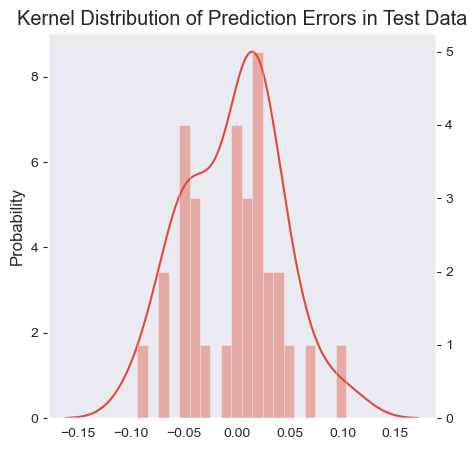

In [67]:
import tensorflow as tf
import numpy as np

# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mc = np.array([predict_stochastic(X_test).numpy() for _ in range(T)])

# Redimensionar as previsões para a forma desejada
y_hat_mc = y_hat_mc.reshape(T, y_test.shape[0]).T
y_hat_mc=pd.DataFrame(y_hat_mc)
yhat=pd.DataFrame(y_hat_mc)

#vamos calcular a média dos 1000 resultados para cada amostra de teste
yhat['mean']=yhat.apply(np.mean,axis=1)

#separamos novamente os 1000 resultados retitrando a coluna média 
yhatd=yhat.iloc[:,0:1000]

#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste
yhatd['std']=yhatd.apply(np.std,axis=1)

#Abaixo os valores reais para y do conjunto de teste
y_test=pd.DataFrame(y_test)

#resetando o índice 
y_test=y_test.reset_index(drop=True)

#retirado a coluna 0
mean=yhat.iloc[:,1000]
mean=pd.DataFrame(mean)
desvpad=yhatd.iloc[:,1000]
desvpad=pd.DataFrame(desvpad)

#colocar tudo em uma tabela
df.resume=pd.concat([y_test,mean,desvpad],axis=1)
erro2=df.resume['mean']-df.resume[5]
es2=erro2.loc[:,].mean()#erro sistemático do modelo
ea2=erro2.loc[:,].std() #erro aleatório do modelo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20
# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro2, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro2, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")
plt.show()

# Determinação erro aleatório e sistemático em todos os dados (Dropout) 

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22804\2674483670.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro3, ax=ax,
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22804\2674483670.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

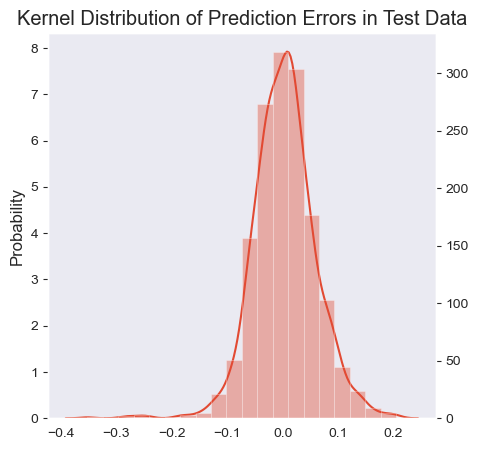

In [69]:
import tensorflow as tf
import numpy as np
# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mct = np.array([predict_stochastic(X).numpy() for _ in range(T)])
# Redimensionar as previsões para a forma desejada
y_hat_mct = y_hat_mct.reshape(T, y.shape[0]).T
yhatt=pd.DataFrame(y_hat_mct)
meanyhatt=yhatt.apply(np.mean,axis=1)
desvyhatt=yhatt.apply(np.std,axis=1)
erro3=meanyhatt-y
es3=erro3.loc[:,].mean()
ea3=erro3.loc[:,].std()

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro3, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro3, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


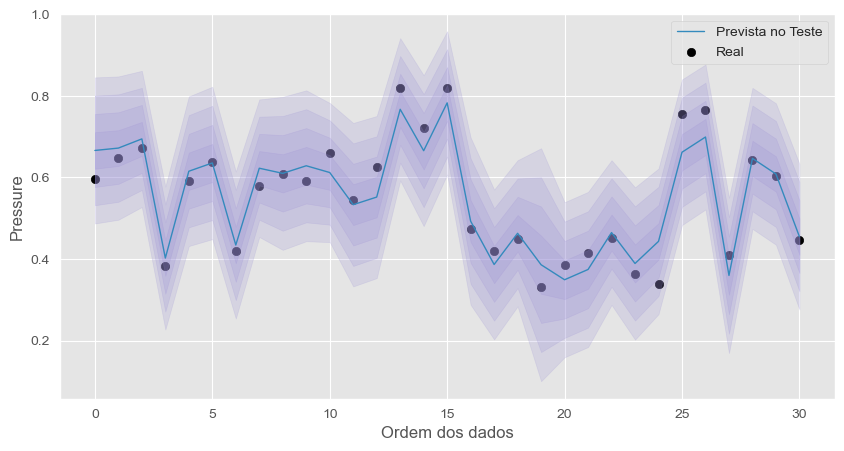

In [79]:
#Computamos média e variância para cada ponto no set de teste.
l = 10
p_dropout =0.5
lbd = 1e-4 
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()


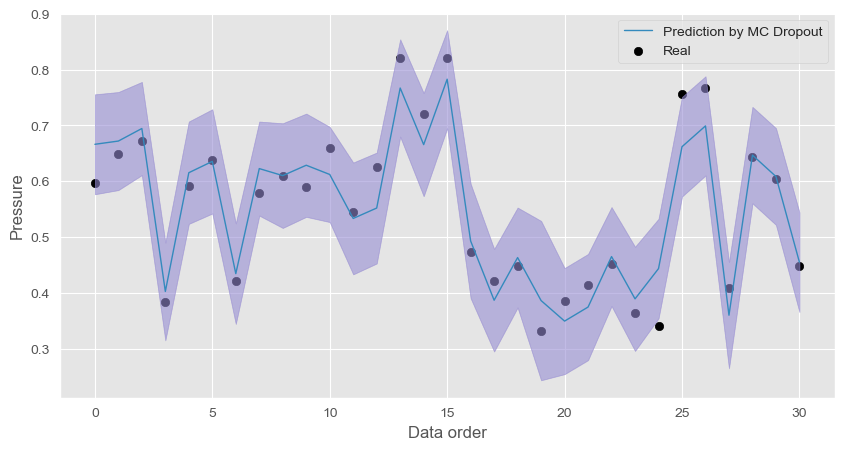

In [77]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prediction by MC Dropout", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.svg")
plt.show()

# Determinação das incertezas da rede método APU para o Dataset escolhido

In [87]:
X_test=X_test.reset_index(drop=True)
previsão=model.predict(X_test[:31])
colnames=["Predict"]
previsão1=pd.DataFrame(previsão, columns=colnames)
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)
#método numerico para derivadas parcias: método das diferenças onde h=0.000001
h1=0.000001
h2=0.000001
h3=0.000001
h4=0.000001
h5=0.000001

deltax1=X_test[:31]+np.array([h1,0,0,0,0])
previsãodeltax1=model.predict(deltax1[:31])
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

deltax2=X_test[:31]+np.array([0,h2,0,0,0])
previsãodeltax2=model.predict(deltax2[:31])
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

deltax3=X_test[:31]+np.array([0,0,h3,0,0])
previsãodeltax3=model.predict(deltax3[:31])
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

deltax4=X_test[:31]+np.array([0,0,0,h4,0])
previsãodeltax4=model.predict(deltax4[:31])
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

deltax5=X_test[:31]+np.array([0,0,0,0,h5])
previsãodeltax5=model.predict(deltax5[:31])
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/h2
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/h3
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/h4
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/h5


#cálculo da incerteza combinada : incerteza expandida de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.5% do valor médio da escala
#x2: medidor de angulo :5% do valor médio da escala
#x3: medidor de comprimento 5% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 5% do valor médio da escala
#y: pressão somora: 5% do valor médio da escala
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'   
},inplace=True)

correlation= df_n.corr()
r_12=correlation['Frequency']['Angle']
r_13=correlation['Frequency']['Length']
r_14=correlation['Frequency']['Velocity']
r_15=correlation['Frequency']['Suction Side']
r_23=correlation['Angle']['Length']
r_24=correlation['Angle']['Velocity']
r_25=correlation['Angle']['Suction Side']
r_34=correlation['Length']['Suction Side']
r_35=correlation['Length']['Velocity']
r_45=correlation['Velocity']['Suction Side']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# Determinação da incerteza aleátória ( ucca) , epistêmica ( ucce) e preditiva (ucc)

In [97]:
#ucca=incerteza dos dados
ucca=((df.total['c1']*upx1)**2+
      (df.total['c2']*upx2)**2+
      (df.total['c3']*upx3)**2+
      (df.total['c4']*upx4)**2+
      (df.total['c5']*upx5)**2+
      2*df.total['c1']*df.total['c2']*upx1*upx2*r_12+
      2*df.total['c1']*df.total['c3']*upx1*upx3*r_13+
      2*df.total['c1']*df.total['c4']*upx1*upx4*r_14+
      2*df.total['c1']*df.total['c5']*upx1*upx5*r_15+
      2*df.total['c2']*df.total['c3']*upx2*upx3*r_23+
      2*df.total['c2']*df.total['c4']*upx2*upx4*r_24+
      2*df.total['c2']*df.total['c5']*upx2*upx5*r_25+
      2*df.total['c3']*df.total['c4']*upx3*upx4*r_34+
      2*df.total['c3']*df.total['c5']*upx3*upx5*r_35+
      2*df.total['c4']*df.total['c5']*upx4*upx5*r_45
                  +upy**2)**0.5

#ucce=Erro randômico do modelo 
ucce=((RE)**2)**0.5
#incerteza combinada ucc
ucc=(ucca**2+ucce**2)**0.5
#incerteza expandida (95%) com a dição do erro sistemático (SE)
U= 2*ucc+abs(SE)
df.total['ucca']=ucca
df.total['ucce']=ucce
df.total['ucc']=ucc
df.total['U']=U

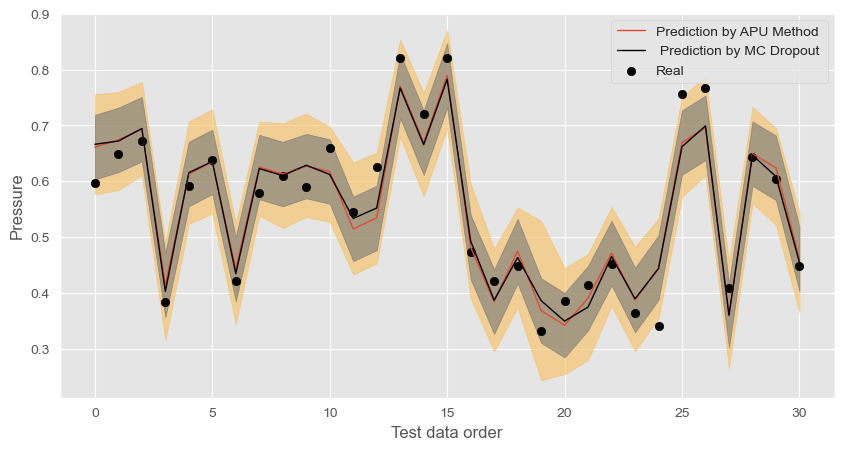

In [138]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, df.total['Predict'], label="Prediction by APU Method ", color="C7", lw=1)
plt.plot(t, mu, label=" Prediction by MC Dropout", color="Black", lw=1)
for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma , alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, df.total['Predict']-df.total['ucce'], df.total['Predict']+df.total['ucce'], alpha=0.2, color="C3")

plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test4.pdf",format='pdf')
plt.show()

In [121]:
MCCC=pd.concat([df.total[5],df.total['Predict'],df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)
# Definir os nomes das colunas
nomes_colunas = ['Real','GUM Predict','GUM Aleatoric Uncertainty','GUM Epistemic Uncertainty','GUM Preditive Uncertainty','GUM_U_exp']
# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas
#MCCC
#MCCC tabela com as discriminações das incertezas 


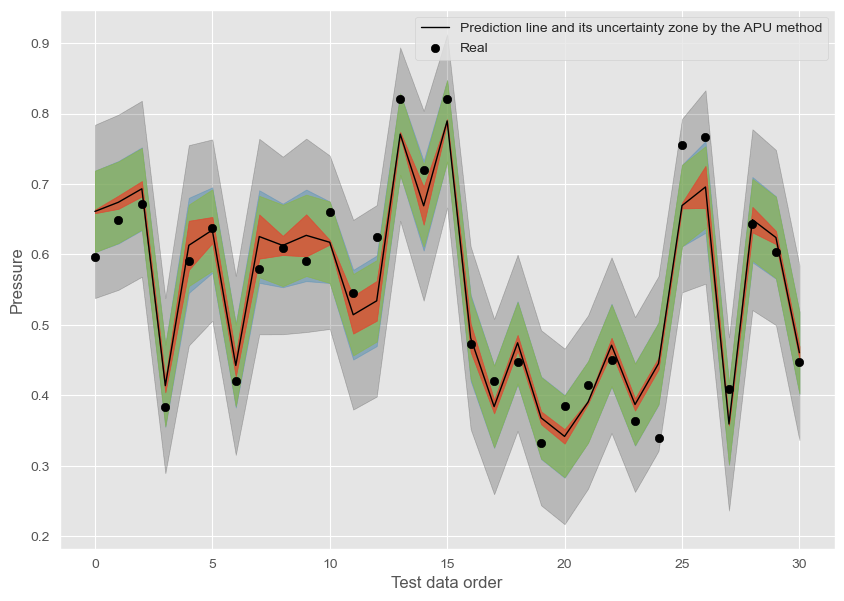

In [103]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['GUM Predict'], label='Prediction line and its uncertainty zone by the APU method', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM_U_exp'],  MCCC['GUM Predict']+MCCC['GUM_U_exp'], alpha=0.05,color="black")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Preditive Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Preditive Uncertainty'], alpha=0.1, color="C8")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Epistemic Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Epistemic Uncertainty'], alpha=0.2, color="C5")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Aleatoric Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Aleatoric Uncertainty'], alpha=0.3, color="C7")

plt.scatter(t, MCCC['Real'], color="black", label="Real")

plt.ylabel("Pressure")
plt.xlabel("Test data order")

plt.legend(loc="best")

f.savefig("APUU",format='pdf')

# Determinação da Incerteza para um dado "vi" qualquer 

In [113]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2
#matriz das incertezas 
I = [
    [upx1**2, upx1*upx2,upx1*upx3,upx1*upx4,upx1*upx5],[0, upx2**2,upx2*upx3,upx2*upx4,upx2*upx5],
    [0, 0,upx3**2,upx3*upx4,upx3*upx5], [0, 0,0,upx4**2,upx4*upx5],
   [0, 0,0,0,upx5**2]]
Id=pd.DataFrame(I)
#print(Id)

#matriz dos coeficientes de correlação 
correlation= df_n.corr()
matriz =correlation.values
#print(matriz)
# Matriz das covariâncias 
A = I
B = matriz

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
C = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    C.append(new_row)

# Imprimindo a matriz resultante C
#for row in C:
   # print(row)

#matriz das derivadas parciais 

#definindo um vi 
x1=0.040404
x2= 0.783784
x3=0.000000
x4=1.000000
x5=0.270697
data = { 'x1': [x1],'x2': [x2],'x3': [x3],'x4': [x4],'x5': [x5]
}
# Criando um DataFrame a partir do dicionário
vi=pd.DataFrame(data)

# dado um vi pertencente ao domínio X

h=0.000001
yi=model.predict(vi)
c1=(model.predict(vi+np.array([h,0,0,0,0]))-model.predict(vi))/h
c2=(model.predict(vi+np.array([0,h,0,0,0]))-model.predict(vi))/h
c3=(model.predict(vi+np.array([0,0,h,0,0]))-model.predict(vi))/h
c4=(model.predict(vi+np.array([0,0,0,h,0]))-model.predict(vi))/h
c5=(model.predict(vi+np.array([0,0,0,0,h]))-model.predict(vi))/h

#matriz dos coef.de sensibilidade 
CS = [
    [c1**2, 2*c1*c2,2*c1*c3,2*c1*c4,2*c1*c5],[0, c2**2,2*c2*c3,2*c2*c4,2*c2*c5],
    [0, 0,c3**2,2*c3*c4,2*c3*c5], [0, 0,0,c4**2,2*c4*c5],
   [0, 0,0,0,c5**2]]

# Matriz das contribuições para incerteza 
A = C
B = CS

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
MC = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    MC.append(new_row)
    
# Inicializando a variável de soma
soma_total = 0

# Percorrendo a matriz e somando os elementos
for linha in MC:
    for elemento in linha:
        soma_total += elemento

ucca_vi=(soma_total)**0.5
ucce_vi=((RE)**2)**0.5
ucc_vi=(ucca_vi**2+ucce_vi**2)**0.5
Up_vi= 2*ucc_vi+abs(SE)
Up_vi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.12291089]], dtype=float32)

In [ ]:
# comparando este resultado  com o da matriz MCCC obtemos o mesmo valor 